In [ ]:
#hide
from theonerig.core import *
#from theonerig.testdata import *

locals().update(load_vivo_2p("./files/vivo_2p"))

Importing the record master

Returning stim_d, S_matrix, A_matrix, proj_TP, proj_DATA, eye_TP, eye_DATA, treadm_DATA, len_records, rec_TP, reM


# Theonerig

> Theonerig (read 'the one rig') is a package to align and filter datastreams acquired with different timings, to facilitate further processing pipeline.

## Install

So far there is no easy install, just clone the folder form github and within the folder install it with pip. We also recommend you to create an environment with conda:

`conda create -n tor` python=3.6<br>
`activate tor` for windows or `source activate tor` for linux/mac<br>
`pip install -e .`<br>

Later we will put it on pip so you can install it with `pip install theonerig`

## How to use

Some example data are located in the "files" folder. We are gonna use data from the subfolder "vivo_2p", acquired by the Asari Lab @ EMBL Rome.<br><br>The main idea behind this library is to use a main timeserie to synchronize other data streams from various source. Once done, it allows easy slicing of the data and apply to it any processing.

### Slicing made easy

An experiment is stored in a Record_Master object (called here reM): Each row shows a stream of data aligned to "main_tp". <br><br>Data can be sparse, meaning that you don't necessarly possess data of each row for the total duration of the record, and can be in multiple chuncks.

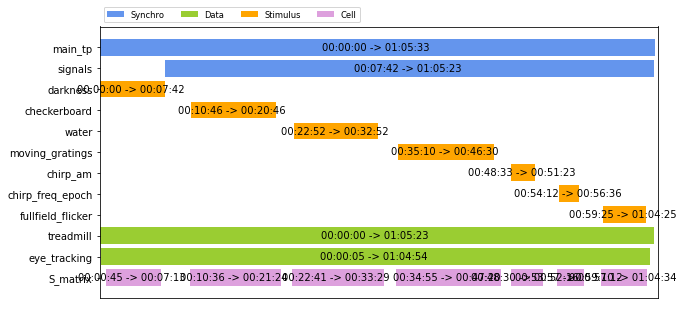

In [ ]:
reM.plot()

Now that we have such dataset, we will use the second main feature of this package, the Data_Pipe. With it, we choose at its creation which rows we want to obtain. In that case, we take "checkerboard" which is a matrix of the stimulus values , the "S_matrix" which is the response of neurons extracted from calcium imaging, and "eye_tracking" to take in account the mouse eye position to compute the response.

In [ ]:
pipe = Data_Pipe(reM, ["checkerboard", "S_matrix", "eye_tracking"])

Now that the pipe is defined, we can use aritmetic and logic operations to choose which part of the record we want data from:

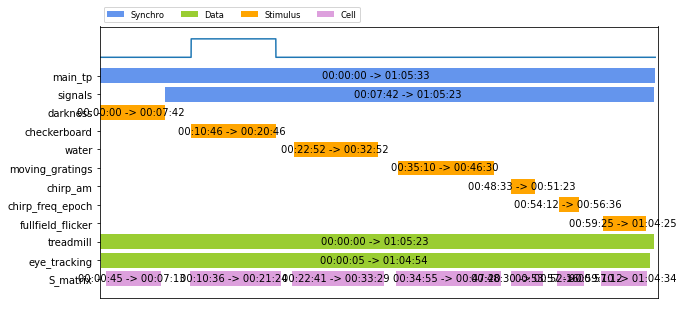

In [ ]:
pipe += "checkerboard" #Add part of the data where checkerboard is present
reM.plot()
pipe.plot()

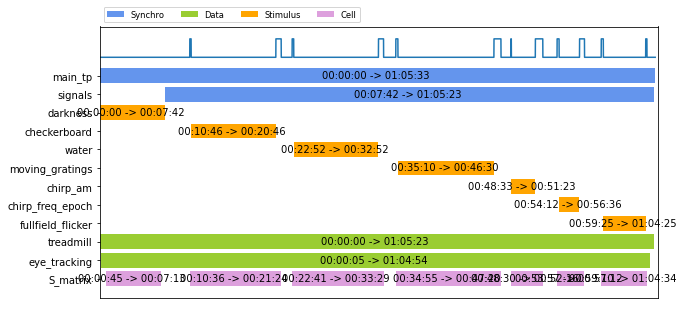

In [ ]:
#Select all cell responses where there is no stimulus

pipe += "S_matrix" 
pipe -= "stim" #use the fact that data are within a class [sync, data, stim, cell] to filter them all at the same time
reM.plot()
pipe.plot()

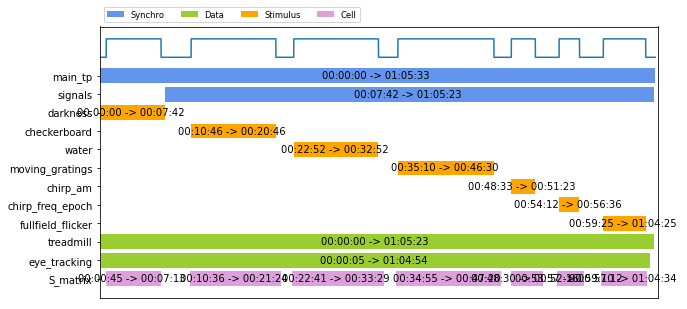

In [ ]:
#Select all cell responses where there is a stimulus. Note the darkness stimulus longer 
#than the corresponding S_matrix

pipe += "S_matrix" #Add all the chuncks of data where there is an S_matrix
pipe &= "stim" #use the fact that data are within a class [sync, data, stim, cell] to filter them all at the same time
reM.plot()
pipe.plot()

Then, the pipe can be iterated and return each separated chunk of data as a dictionnary containg each data selected

In [ ]:
print(pipe[0].keys())
for data_dict in pipe:
    print(data_dict["checkerboard"].shape, data_dict["S_matrix"].shape, data_dict["eye_tracking"].shape)

dict_keys(['checkerboard', 'S_matrix', 'eye_tracking'])
(23303, 15, 20) (23303, 2) (23303, 5)
(36000, 15, 20) (36000, 2) (36000, 5)
(36000, 15, 20) (36000, 2) (36000, 5)
(40800, 15, 20) (40800, 2) (40800, 5)
(10200, 15, 20) (10200, 2) (10200, 5)
(8680, 15, 20) (8680, 2) (8680, 5)
(18000, 15, 20) (18000, 2) (18000, 5)


Note here the checkerboard. We possess actual data for only one chunk, but because default values are set for each dataset, the pipe is able to return a dataset for each part of the record. This allows to easily workaround records with missing data without crashing.